<a href="https://colab.research.google.com/github/BradGamez/CUS-1166-VCRTS/blob/main/ProblemSet_04%5CProblem_Set_04_EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 04 - Edge Detections
**Professor:** Dr. Christoforos Christoforou


## Exercise 1
Edge detection is one of the most important operations in Computer Vision. In this exercise we will investigate how it can be performed and what information can be obtained from it.

One of the ways to detect edges is to compute image intensity gradients. They can be approximated by convolving image with Sobel filters. They consist of 2 $3 \times 3$ filters:

\begin{equation*}
S_x = \frac{1}{8}
\begin{bmatrix}
-1 & 0 & +1\\
-2 & 0 & +2\\
-1 & 0 & +1\\
\end{bmatrix}
\hspace{2cm}
S_y = \frac{1}{8}
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
+1 & +2 & +1\\
\end{bmatrix}
\end{equation*}

where $S_x$ computes the partial derivative of the image in the horizontal direction, while $S_y$ does it in the vertical direction.


**Exercise 1.1:**
* Load an image and convert it to gray scale (i.e. using the ```cv.cvtColor``` functions with `cv.COLOR_BGR2GRAY`) .

* Compute the image derivatives in x- and y-directions using Sobel filters. You can do that in a couple of ways.  One appoach is to use the function ```python cv2.Sobel()``` from openCV library.  A second appoach, you can define the sobel kernel manually (i.e. as a 2D array, one kernel for X and one kernel for Y) and use the  ```python cv.filter2D``` method to convolve the image with each of the two sobel kernel. For this task you are expected to compuer the derivatives in x- and y-directions using both approches.


* Visualize the image gradients. How can you explain the differences between the two results?

In [1]:
#
# Load an image from the following URL and convert it into gray scale.
#  url1 = 'https://gray-kalb-prod.cdn.arcpublishing.com/resizer/ZEfu9gsAgnX7p95ZECl6vgRIv8M=/1200x675/smart/cloudfront-us-east-1.images.arcpublishing.com/gray/TFRH56MPINB3RJ23IDIAILPMOE.png'
#  url2: https://news.northeastern.edu/wp-content/uploads/2020/07/071420_MM_Coins_1400.jpg#

import cv2 as cv
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gray-kalb-prod.cdn.arcpublishing.com/resizer/ZEfu9gsAgnX7p95ZECl6vgRIv8M=/1200x675/smart/cloudfront-us-east-1.images.arcpublishing.com/gray/TFRH56MPINB3RJ23IDIAILPMOE.png'
img = io.imread(url)
img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [9]:
#
# Calculate the image derivatives in x- and y-direction using the cv.Sobel method
#
sobelx = cv.Sobel(img_grey,cv.CV_64F,1,0)
sobely = cv.Sobel(img_grey,cv.CV_64F,0,1)

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

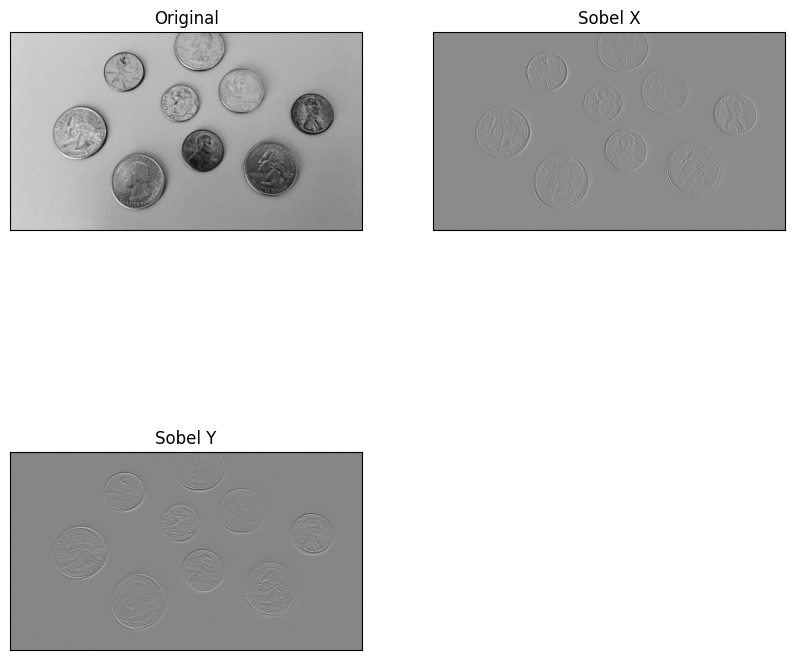

In [10]:
#
# Visualize the image gradients calculated using the cv.Sobel approach.
#
plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img_grey,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

In [19]:
#
# Calculate the image derivatives in x- and y-direction using manually designed sobel kernels and the cv.filter2D method
#
sobel_kernel_x = np.array([[-1,0,1],
                           [-2,0,2],
                           [-1,0,1]])
sobel_kernel_y = np.array([[-1,-2,-1],
                           [0,0,0],
                           [1,2,1]])

filter_x = cv.filter2D(img_grey,cv.CV_64F,sobel_kernel_x)
filter_y = cv.filter2D(img_grey,cv.CV_64F,sobel_kernel_y)

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

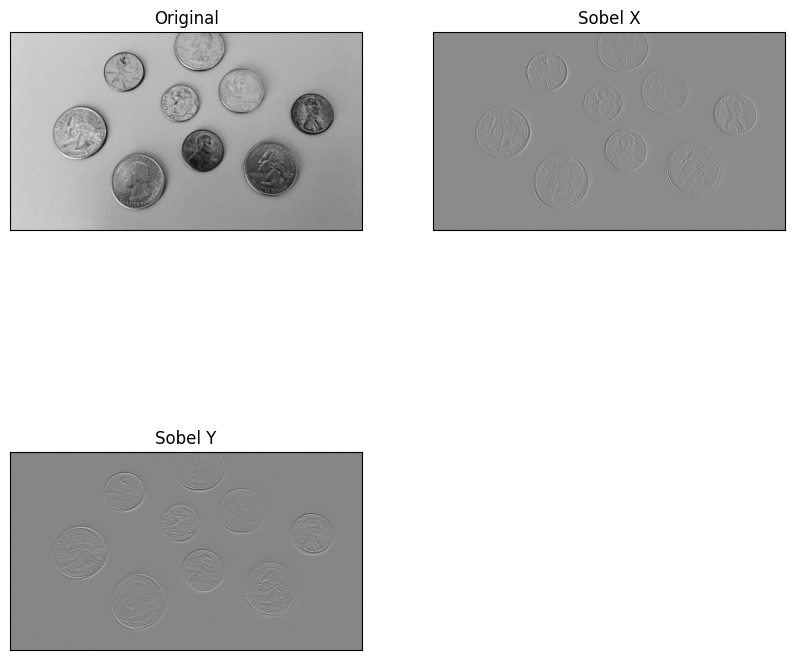

In [20]:
#
# Visualize the image gradients calculated using the cv.filter2D approach.
#
plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img_grey,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(filter_x,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(filter_y,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

Mathematically, the goal of the filters $S_x$ and $S_y$ is to approximate the derivatives of the image with respect to the horizontal and vertical directions respectively, such that
\begin{equation*}
\nabla I_x(x,y) = (I*S_x)[x,y]
\quad\mathrm{and}\quad
\nabla I_y(x,y) = (I*S_y)[x,y]
\end{equation*}

Therefore, the gradient of an image at each point is a 2D vector
\begin{equation*}
\nabla I =
\begin{bmatrix}
\nabla I_x\\
\nabla I_y
\end{bmatrix}
\end{equation*}

This vector can be computed for every pixel. Its magnitude and phase (i.e. angle)  can be computed as
\begin{equation*}
|| \nabla I || = \sqrt{(\nabla I_x)^2 + (\nabla I_y)^2} \\
\angle \nabla I = atan2(\nabla I_x, \nabla I_y)
\end{equation*}

$\it{Note:}$ we use atan2() instead of atan() to be able to determine the right quadrant of the phase.


**Exercise 1.2**
* Using the previously computed image gradients and the above formula compute the gradient magnitude and gradient phase. You can use the numpy functions `np.sqrt', `np.power` and `np.arctan2`.

* Visualize the **gradient magnitude** and **phase** images along with the **original image**. Plot all three images in a single row using the subplot function. Where does the gradient have high magnitude? How does the phase change along the coin border?



In [21]:
#
#  Use this cell to calculate the magnitute and angle of the gradients calculated in exercise 1
#
magnitude = np.sqrt(np.power(sobelx,2) + np.power(sobely,2))
phase = np.arctan2(sobely,sobelx)

print(f"magnitude: {magnitude}")
print(f"phase: {phase}")

magnitude: [[ 0.          2.          4.         ...  2.          2.
   0.        ]
 [ 2.          4.24264069  4.24264069 ...  4.          5.65685425
   6.        ]
 [ 4.          4.24264069  1.41421356 ...  8.48528137  8.60232527
   8.        ]
 ...
 [ 4.         12.         11.40175425 ...  3.16227766  2.
   2.        ]
 [ 0.         16.         12.         ...  0.          0.
   0.        ]
 [ 0.         16.         12.         ...  0.          0.
   0.        ]]
phase: [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 1.57079633  0.78539816  0.78539816 ...  0.          0.78539816
   1.57079633]
 [ 1.57079633  0.78539816  0.78539816 ... -0.78539816 -0.95054684
  -1.57079633]
 ...
 [ 1.57079633  3.14159265 -2.48054948 ...  1.24904577  0.
  -1.57079633]
 [ 0.          3.14159265  3.14159265 ...  0.          0.
   0.        ]
 [ 0.          3.14159265  3.14159265 ...  0.          0.
   0.        ]]


(Text(0.5, 1.0, 'Phase'), ([], []), ([], []))

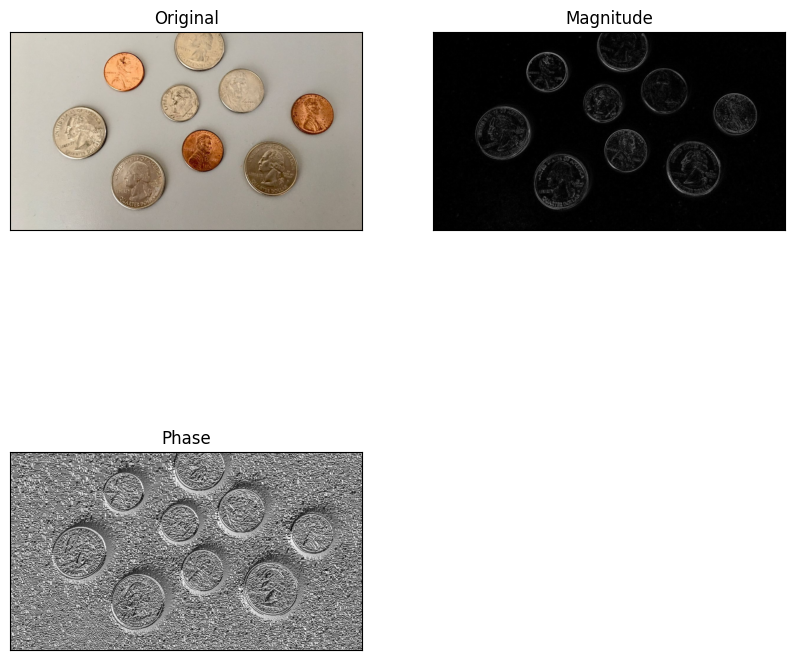

In [22]:
#
# Visualize the gradient magnitute, phase and original image.
#
plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(magnitude,cmap = 'gray')
plt.title('Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(phase,cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])

**Respond to the questions** : Where does the gradient have high magnitude? How does the phase change along the coin border?

Your Response here:

The gradient has high magnitude along the coin borders because that's where the rate of change is the largest. The phase change along the coin border tells us the direction of the magnitude.

## Exercise 2 Laplacian of Gaussian opertator

An alternative way to detect image is to use the Laplacian operator. The opertor is calculated as the sum of the second partial derivatives along the x and y axis. To reduce the noise in the image, it is important that you first filter the image using a gaussian filter.  The operator is defined for an image f as:

$$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

The operator is implemented in the openCV libary in the function `cv.Laplacian`

**Execise 2.1**
* Load an image, apply a graussina filter to reduce the noise (i.e. using the cv.GaussianBlur functions) and apply the laplacian operator.

* Visualize the origianl image and the Laplacian.

You can use the following tutorial as a [reference](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html).


In [23]:
#
# Load, filter, and generate the laplacian of the input image.
#
url = "https://news.northeastern.edu/wp-content/uploads/2020/07/071420_MM_Coins_1400.jpg"
img = io.imread(url)
img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(img_grey,(3,3),0)
laplacian = np.uint8(np.absolute(cv.Laplacian(img_blur,cv.CV_64F)))

(Text(0.5, 1.0, 'Laplacian'), ([], []), ([], []))

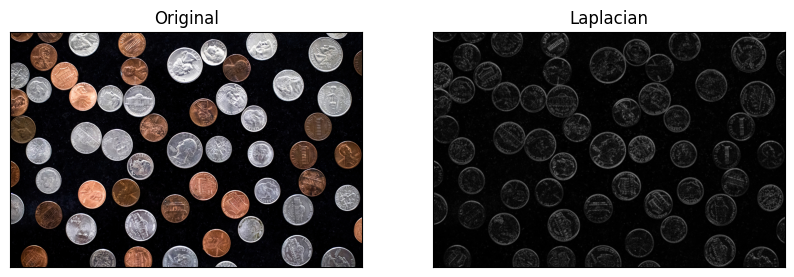

In [24]:
#
# Visualize the original image the the Laplacian.
#
plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.